In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import scipy.stats as stats



In [2]:
pd.options.display.float_format = '{:,.2f}'.format
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df_yearly = pd.read_csv(r'C:\PROJECT\Dr_Semmelweis_Handwashing_Discovery\annual_deaths.csv')
df_monthly = pd.read_csv(r'C:\PROJECT\Dr_Semmelweis_Handwashing_Discovery\monthly_deaths.csv',parse_dates=['date'])

In [4]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
df_yearly.shape

(12, 4)

In [6]:
df_yearly.isna()

,year,births,deaths,clinic
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [8]:
df_yearly.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [9]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [10]:
df_monthly.shape

(98, 3)

In [11]:
df_monthly['deaths']

0     37
1     18
2     12
3      4
4      2
      ..
93     9
94     5
95     9
96    12
97    20
Name: deaths, Length: 98, dtype: int64

In [12]:
print(f'Any yearly NaN values? {df_monthly.isna().values.any()}')
print(f'Any monthly NaN values? {df_yearly.isna().values.any()}')

Any yearly NaN values? False
Any monthly NaN values? False


In [13]:
print(f' Any yearly duplicate? {df_yearly.duplicated().values.any()}')
print(f' Any monthly duplicate? {df_monthly.duplicated().values.any()}')

 Any yearly duplicate? False
 Any monthly duplicate? False


In [14]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [15]:
probability = df_yearly.deaths.sum() / df_yearly.births.sum() * 100 

In [16]:
print(f'Chances of dying in the 1840s in Vienna : {probability: .3} %')

Chances of dying in the 1840s in Vienna :  7.08 %


In [17]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [18]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


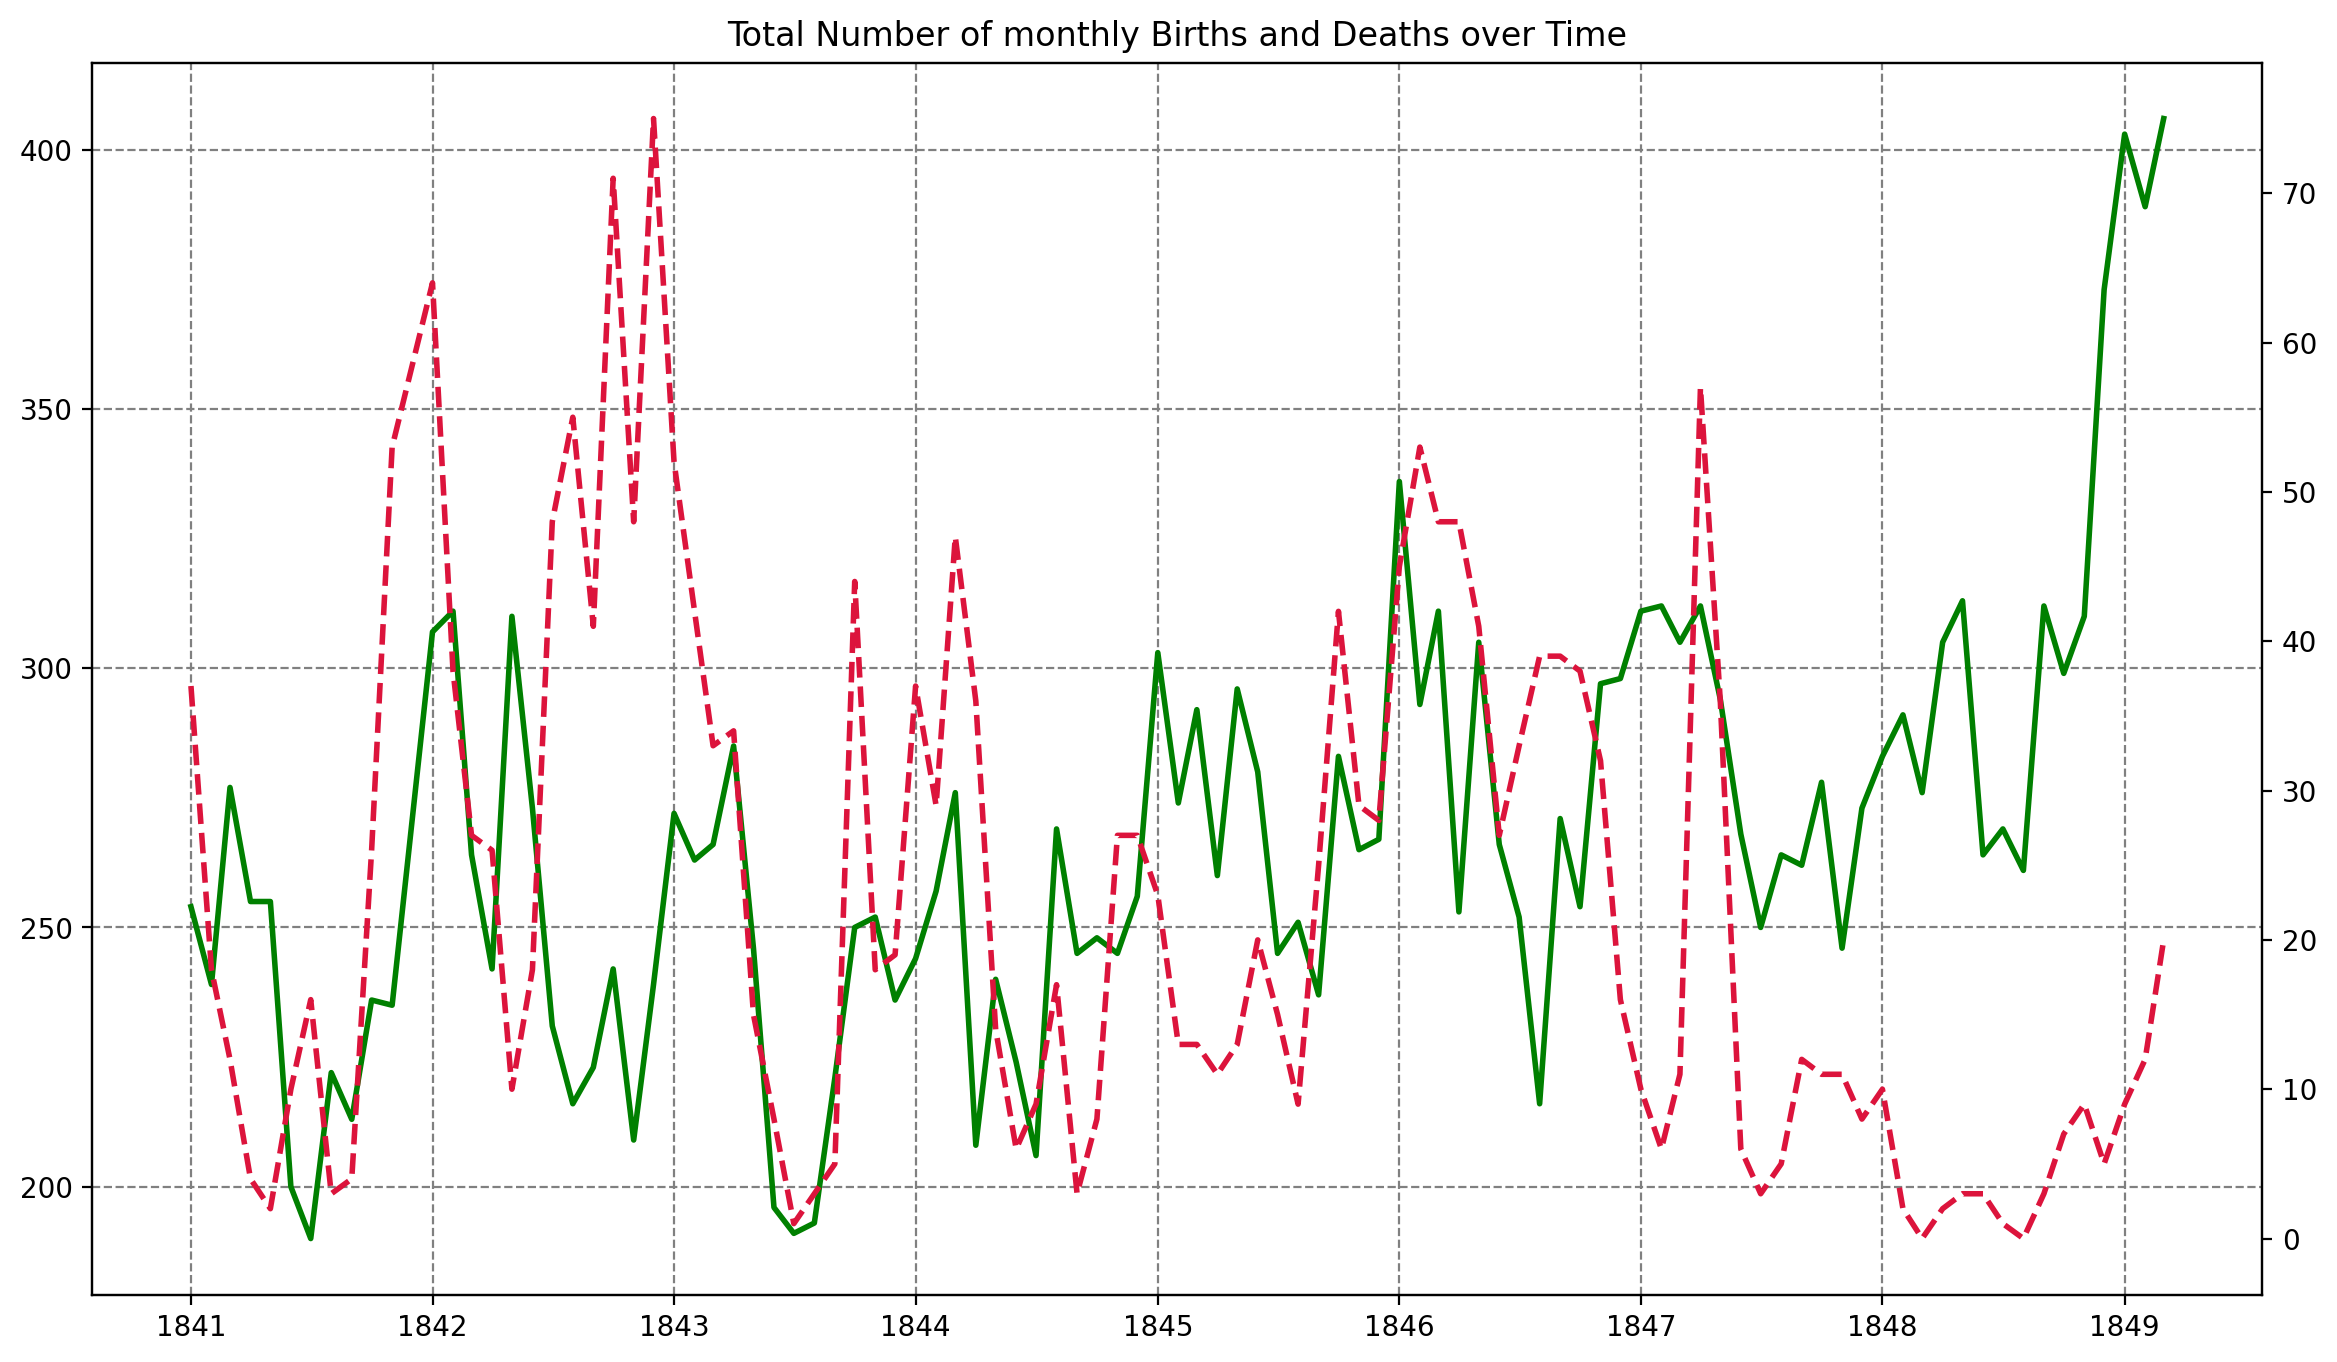

In [19]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of monthly Births and Deaths over Time')
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color = 'gray', linestyle = '--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color= 'green',
         linewidth = 2,
         
         )
ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color = 'crimson',
         linewidth = 2,
         linestyle = '--')

plt.show()



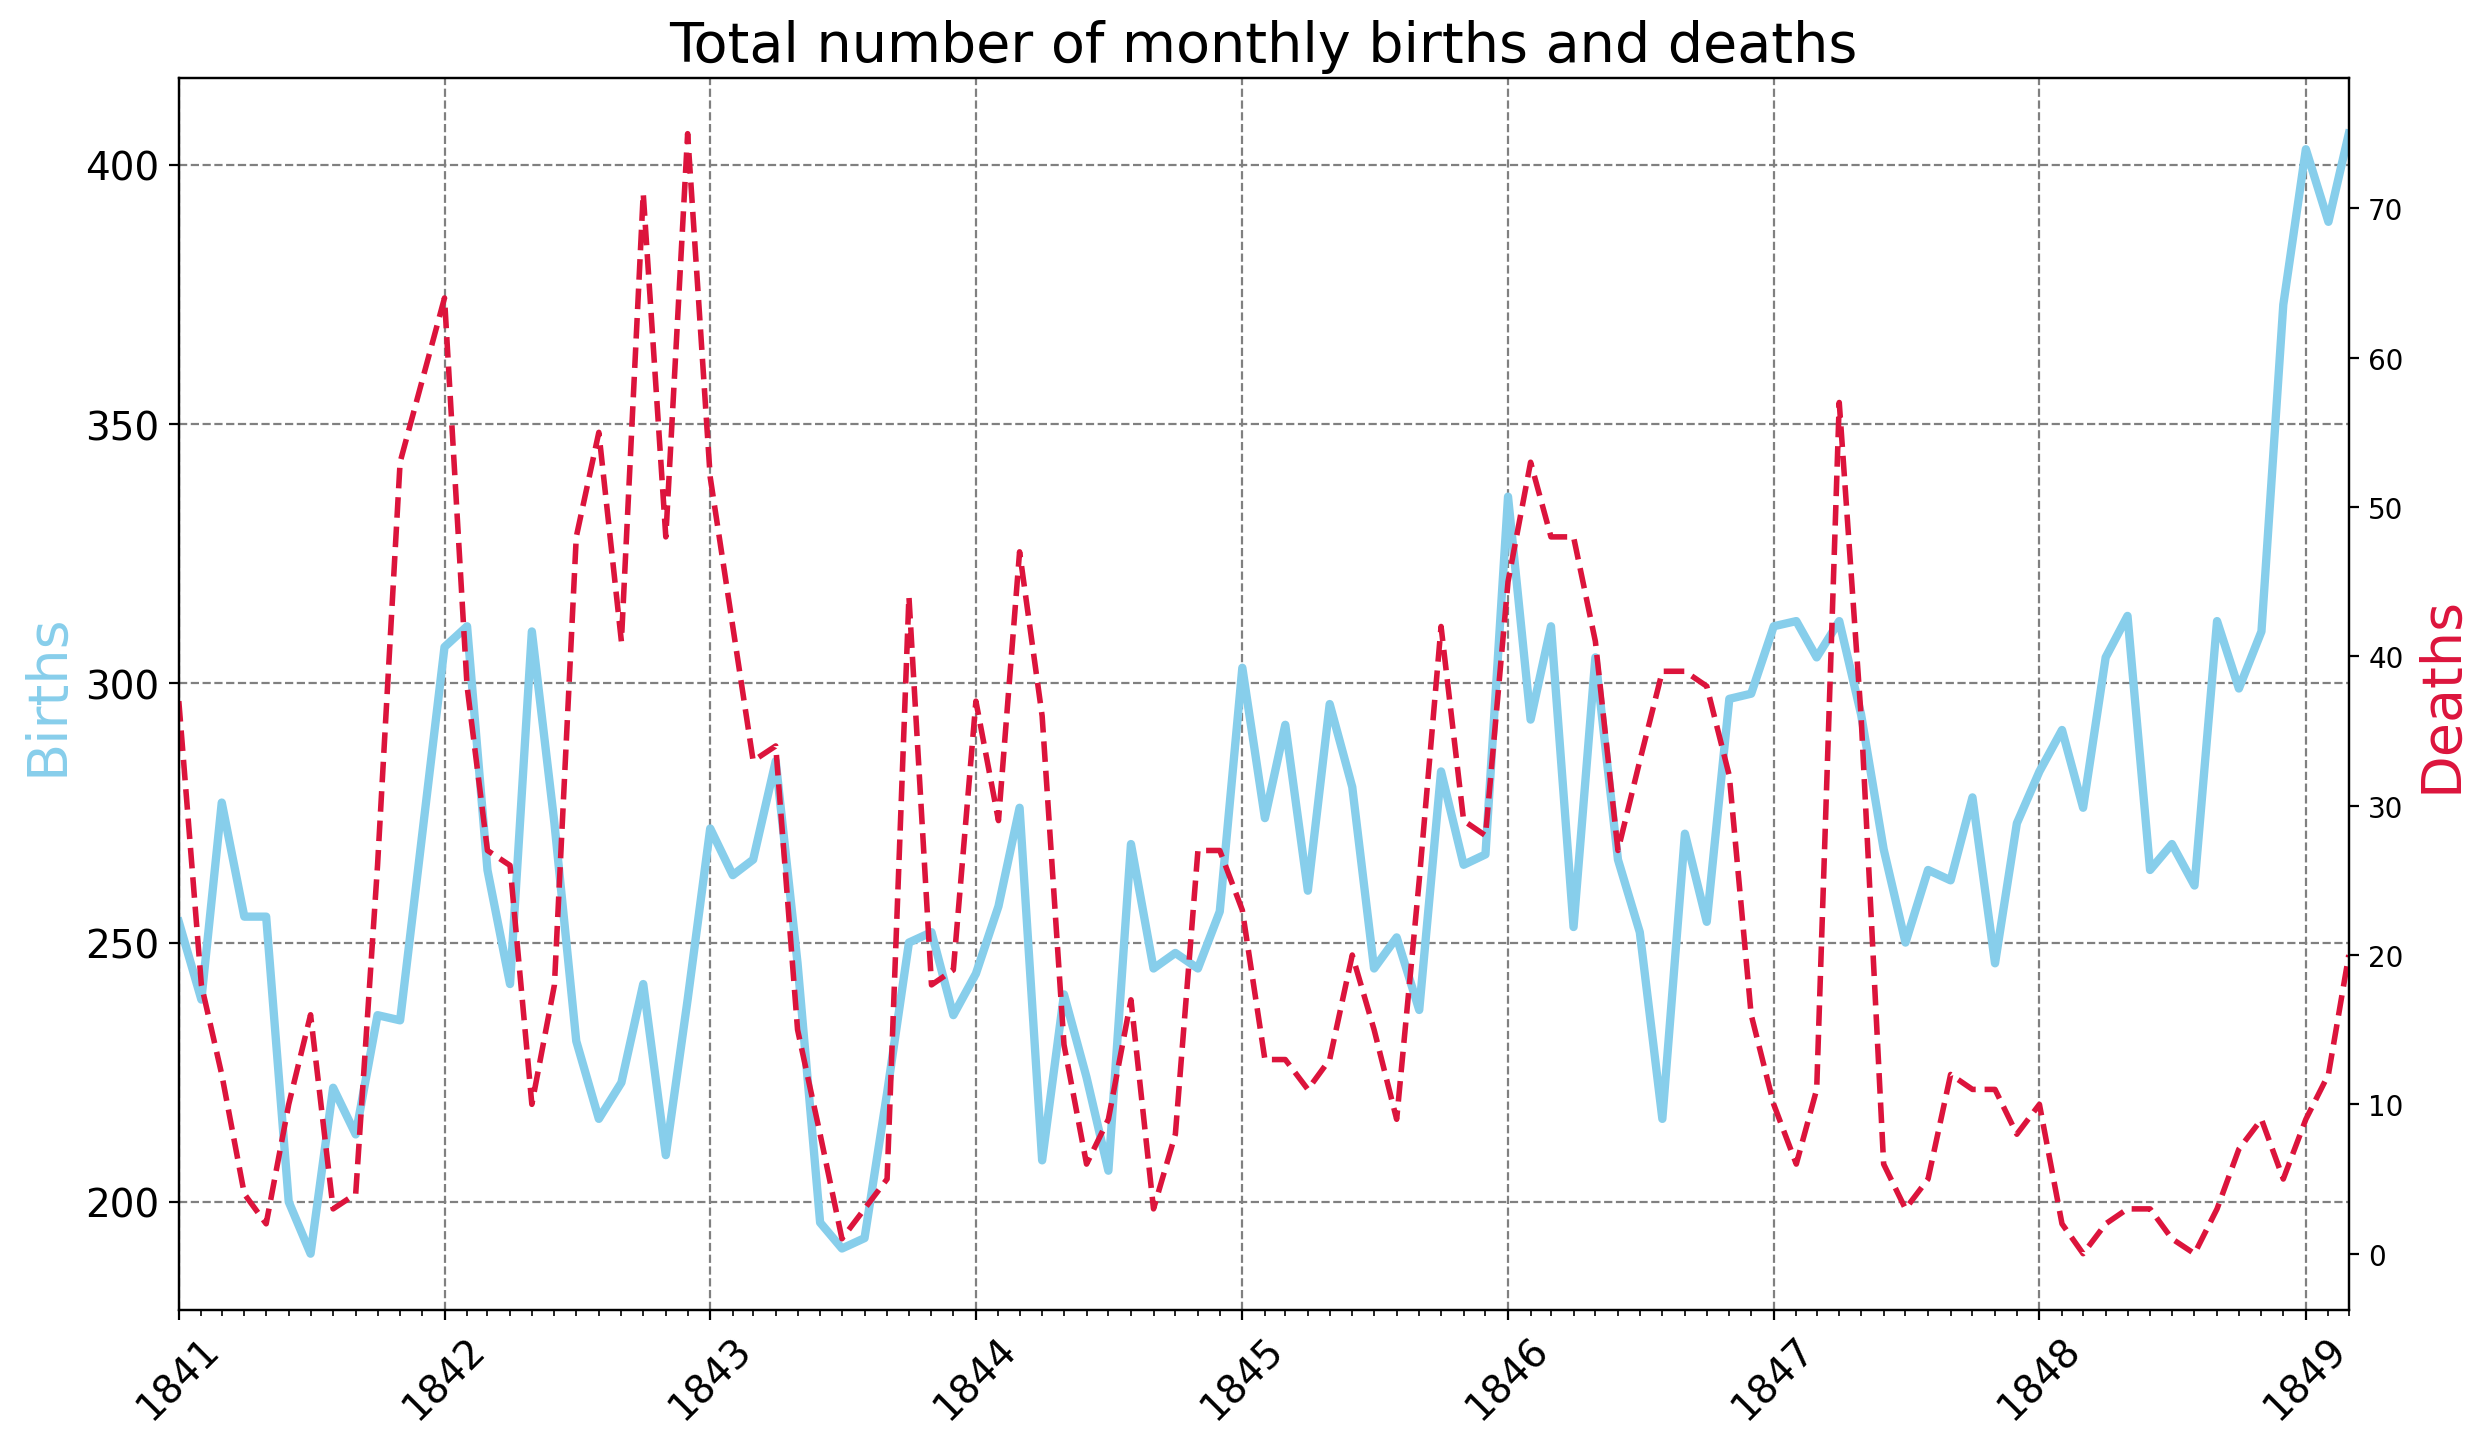

In [20]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of monthly births and deaths', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('Births',color = 'skyblue',fontsize = 20)
ax2.set_ylabel('Deaths', color = 'crimson', fontsize = 20)

ax1.set_xlim([df_monthly.date.min(),df_monthly.date.max()])
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(month)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')

plt.show()

Something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births.



In [21]:
line_chart = px.line(df_yearly,
                     x='year',
                     y='births',
                     color = 'clinic',
                     title = 'Total yearly births by clinic'
                     )



line_chart.show()


In [22]:
line_chart = px.line(df_yearly,
                     x='year',
                     y='deaths',
                     color = 'clinic',
                     title = 'Total yearly deaths by clinic'
                     )



line_chart.show()


More and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2. On the other hand, not only were more people born in clinic 1, more people also died in clinic 1.

In [23]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [24]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
average_cl1 = clinic_1.deaths.sum()/ clinic_1.births.sum()* 100
print(f' Average death rate is:{average_cl1: .3}')

 Average death rate is: 9.92


In [25]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
average_cl2 = clinic_2.deaths.sum()/ clinic_2.births.sum()* 100
print(f' Average death rate is:{average_cl2: .3}')

 Average death rate is: 3.88


In [26]:
line_chart = px.line(df_yearly,
                    x = 'year',
                    y= 'pct_deaths',
                    color = 'clinic',
                    title=' Proportion of yearly death by clinic')
line_chart.show()

In [27]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [28]:
handwashing_start = pd.to_datetime('1847-06-01')
before_handwash = df_monthly[df_monthly.date < handwashing_start]
after_handwash = df_monthly[df_monthly.date >= handwashing_start]

In [29]:
bw_rate = before_handwash.deaths.sum() / before_handwash.births.sum() * 100
aw_rate = after_handwash.deaths.sum() / after_handwash.births.sum() * 100
print(f' Average death rate before 1847 was {bw_rate: .4} %')
print(f' Average death rate after 1847 was {aw_rate: .3} %')

 Average death rate before 1847 was  10.53 %
 Average death rate after 1847 was  2.15 %


In [30]:
period_df = before_handwash.set_index('date')
period_df = period_df.rolling(window = 6).mean()

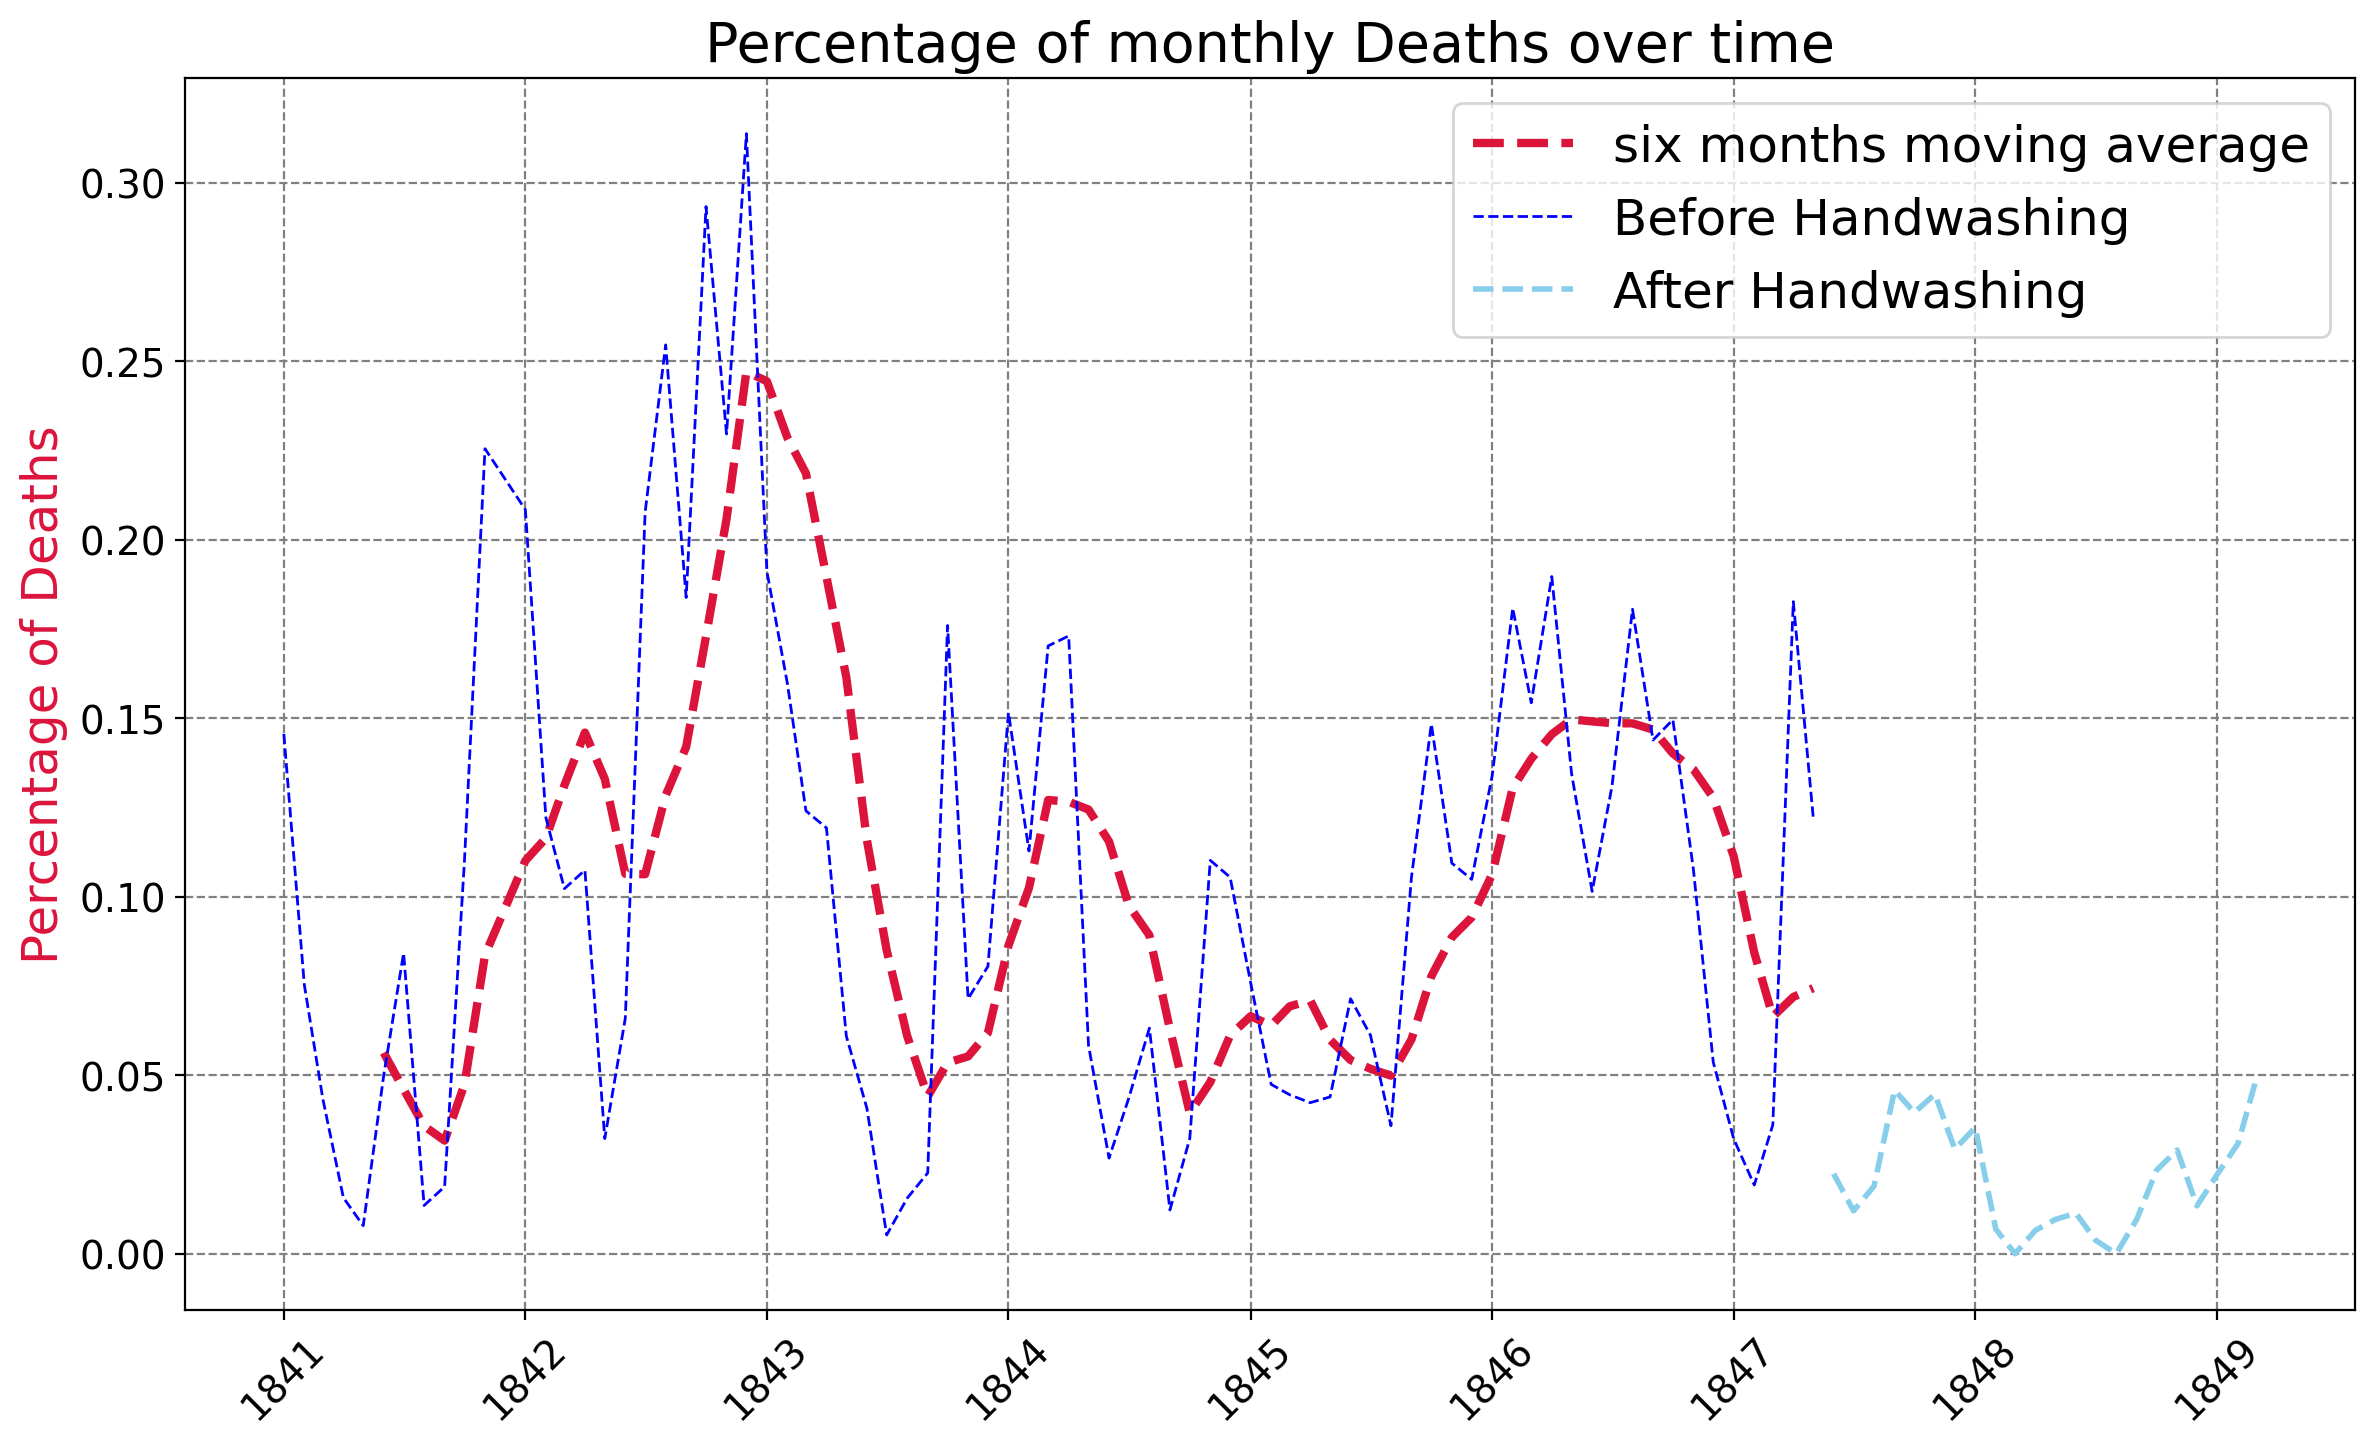

In [31]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of monthly Deaths over time', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.ylabel('Percentage of Deaths', color = 'crimson',fontsize = 18)
ax = plt.gca

#


plt.grid(color = 'gray', linestyle = '--')

#It's important to notice that .plot() returns more than one thing, so we need to use a comma (,) 
# since we're only grabbing the first item. We can then feed these handles into plt.legend().#

monthly_average,=plt.plot(period_df.index,
                          period_df.pct_deaths,
                          color = 'crimson',
                          linewidth = 3,
                          linestyle ='--',
                          label = 'six months moving average')
bw_line, =plt.plot(before_handwash.date,
         before_handwash.pct_deaths,
         color = 'blue',
         linewidth = 1,
         linestyle = '--',
         label = 'Before Handwashing')

aw_line ,=plt.plot(after_handwash.date,
         after_handwash.pct_deaths,
         color = 'skyblue',
         linewidth = 2,
         linestyle = '--',
         label = 'After Handwashing')
plt.legend(handles=[monthly_average,bw_line,aw_line],fontsize = 18)


plt.show()

In [32]:
avg_prob_before = before_handwash.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
avg_prob_after = after_handwash.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_after:.3}%.')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth before handwashing: 2.11%.


In [33]:
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

Handwashing reduced the monthly proportion of deaths by 8.4%!


In [34]:
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

This is a 5.0x improvement!


In [35]:
df_monthly['washing_hands'] = np.where(df_monthly.date< handwashing_start,'No','Yes')

In [36]:
df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [37]:
box = px.box(df_monthly, 
             x= 'washing_hands',
             y= 'pct_deaths',
             color = 'washing_hands',
             title = 'How the statisics change with handwashing')
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range.

In [38]:
hist = px.histogram(df_monthly,
                    x='pct_deaths',
                    color= 'washing_hands',
                    nbins = 40,
                    opacity = 0.6,
                    barmode = 'overlay',
                    histnorm = 'percent',
                    marginal = 'box')
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
hist.show()

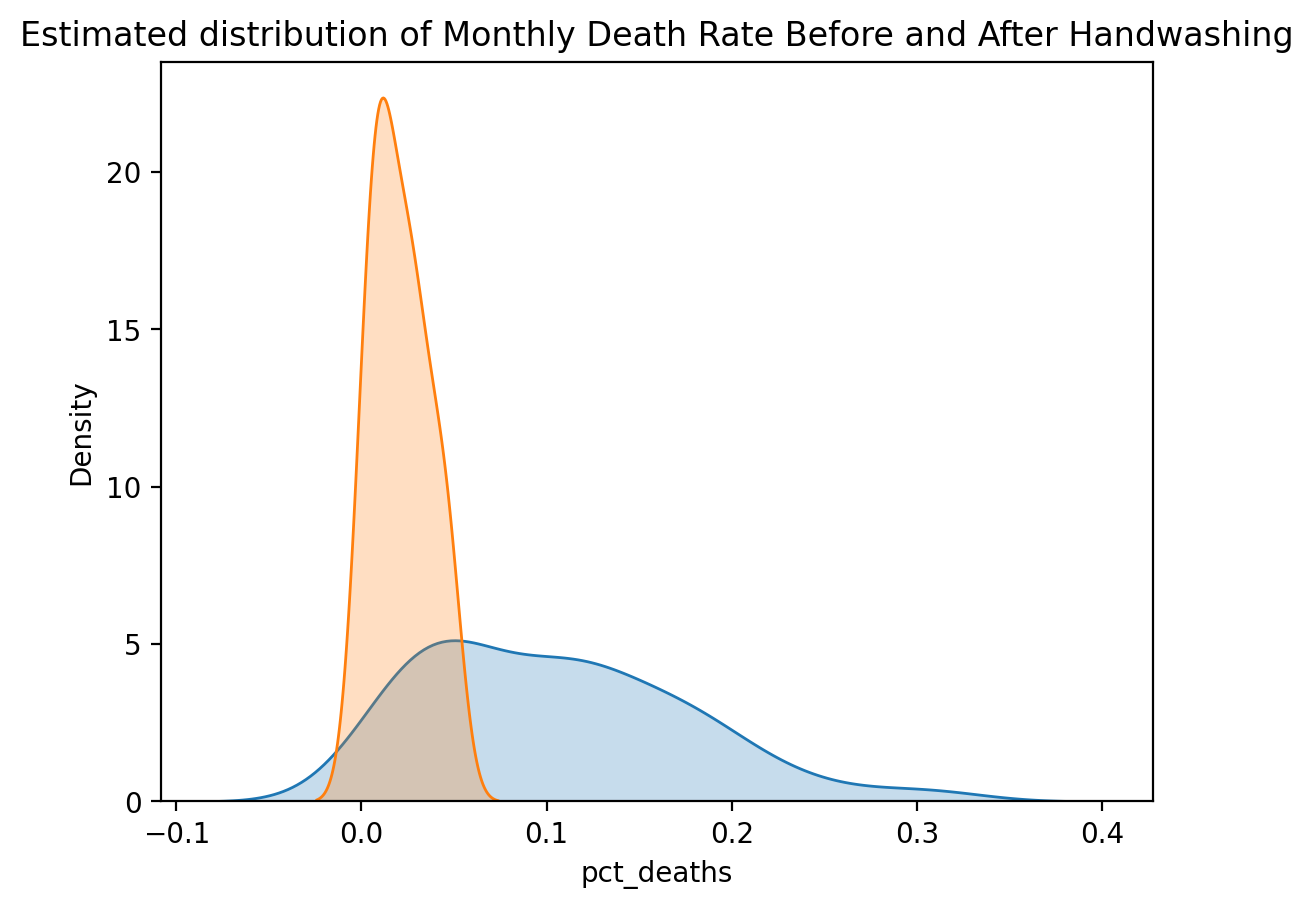

In [39]:
plt.figure(dpi=200)
sns.kdeplot(before_handwash.pct_deaths, shade=True)
sns.kdeplot(after_handwash.pct_deaths, shade=True)
plt.title('Estimated distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

We end up with a negative monthly death rate on the left tail.

<function matplotlib.pyplot.show(close=None, block=None)>

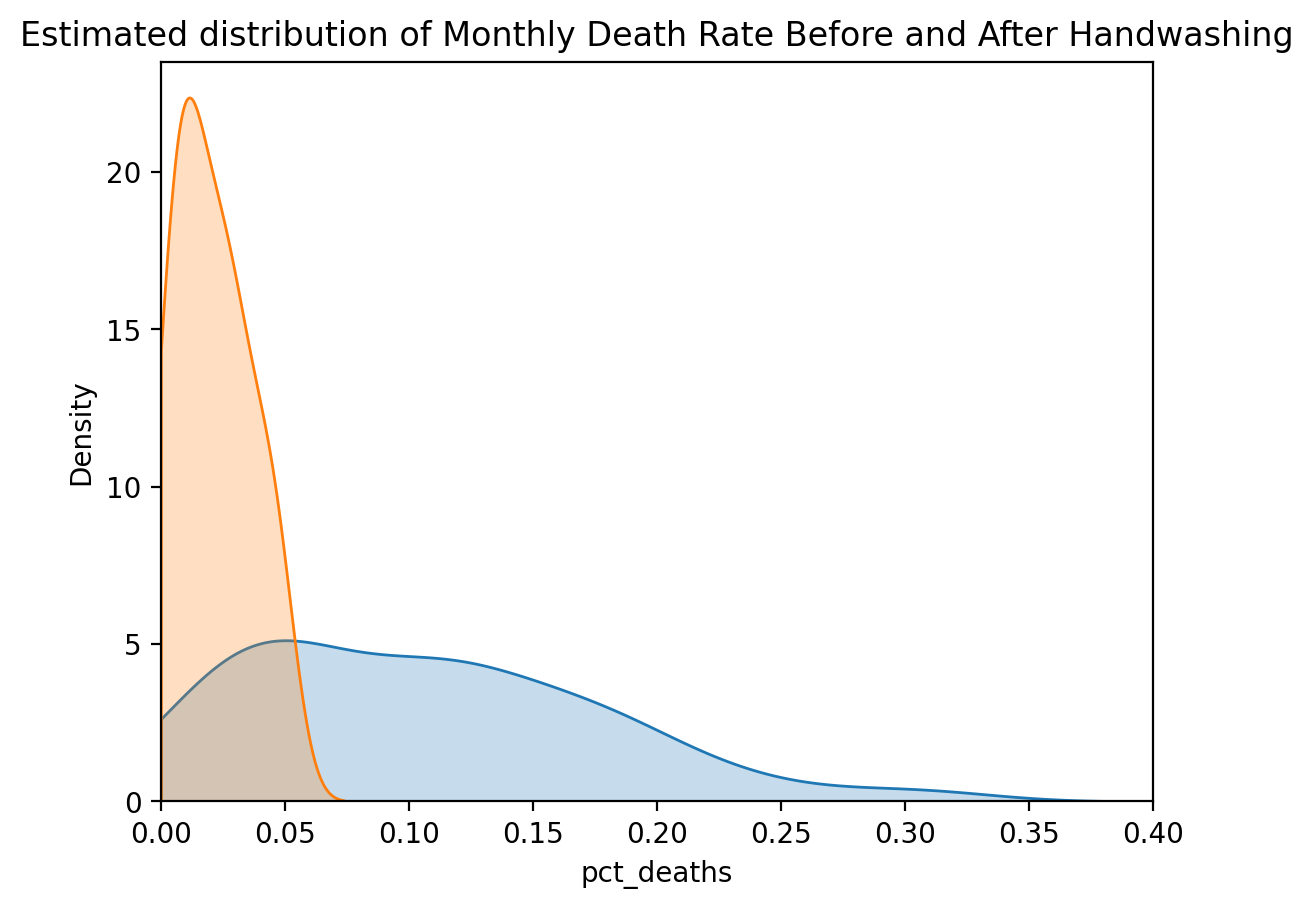

In [40]:
plt.figure(dpi=200)
sns.kdeplot(before_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Estimated distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.



In [41]:
t_stat, p_value = stats.ttest_ind(a=before_handwash.pct_deaths, 
                                  b=after_handwash.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')


p-palue is 0.0000002985
t-statstic is 5.512


The p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant.